<a href="https://colab.research.google.com/github/kit-v4399/229351-StatisticalLearning/blob/main/229351-LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [4]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(10)

--2025-06-26 03:48:50--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-06-26 03:48:50--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  5.01MB/s    in 0.3s    

2025-06-26 03:48:50 (5.01 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [10]:
housing.shape

(200, 4)

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Which variable has missing data?

In [ ]:
housing = housing.dropna()

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [6]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget  http://donlapark.pages.dev/229351/data/Advertising.csv

Ads = pd.read_csv("Advertising.csv")

Ads.head(5)

--2025-06-26 02:58:39--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-06-26 02:58:39--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-06-26 02:58:39 (21.1 MB/s) - ‘Advertising.csv’ saved [3870/3870]



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
# code here

In [7]:
Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Your answers here:

## Calling, indexing & modifying dataframes

In [15]:
# calling a column

housing['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


`ocean_proximity` is categorical. Let's count its values.

In [16]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


## Basic statistics of a variable

In [17]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

Mean:  2635.7630813953488
Standard deviation:  2181.615251582787
Maximum:  39320.0
Minimum:  2.0


In [18]:
housing[["longitude", "latitude", "housing_median_age"]]

,longitude,latitude,housing_median_age
0,-122.23,37.88,41.0
1,-122.22,37.86,21.0
2,-122.24,37.85,52.0
3,-122.25,37.85,52.0
4,-122.25,37.85,52.0
...,...,...,...
20635,-121.09,39.48,25.0
20636,-121.21,39.49,18.0
20637,-121.22,39.43,17.0
20638,-121.32,39.43,18.0


In [ ]:
housing.loc[0]

## Extracting a subset of dataframe

In [19]:
housing.loc[1:3, ["longitude","latitude"]]

,longitude,latitude
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85


In [47]:
housing.iloc[2:5,:]

,median_income,median_house_value,ocean_proximity
2,7.2574,352100.0,NEAR BAY
3,5.6431,341300.0,NEAR BAY
4,3.8462,342200.0,NEAR BAY


## Selecting rows based on conditions

In [55]:
housing[housing['latitude']>=40]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
19803,-123.22,40.16,27.0,1848.0,449.0,396.0,150.0,2.8472,41300.0,INLAND
19804,-123.48,40.34,19.0,518.0,108.0,216.0,80.0,2.7083,64500.0,INLAND
19805,-123.43,40.22,20.0,133.0,35.0,87.0,37.0,3.6250,67500.0,INLAND


In [ ]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [ ]:
# code here

In [27]:
housing.loc[200:400, ["total_bedrooms"]].max()

In [13]:
new_house = housing[housing['total_bedrooms'] >= 900]

In [12]:
new_house.loc[:,["median_income",	"median_house_value",	"ocean_proximity"]]

,median_income,median_house_value,ocean_proximity
1,8.3014,358500.0,NEAR BAY
95,2.0096,130000.0,NEAR BAY
96,2.8345,183800.0,NEAR BAY
98,1.2185,170000.0,NEAR BAY
99,2.6104,193100.0,NEAR BAY
...,...,...,...
20563,3.1250,132500.0,INLAND
20567,5.3064,165000.0,INLAND
20569,4.1997,133400.0,INLAND
20603,1.3375,59600.0,INLAND


## Plotting

In [ ]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(3)

In [ ]:
housing.plot.scatter(x="longitude", y="latitude");

In [ ]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = housing.corr()

corr_matrix

### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [16]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [17]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [21]:
groups = df.groupby('dataset')

In [22]:
groups.get_group('I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [23]:
groups.max()

,x,y
dataset,,
I,14.0,10.84
II,14.0,9.26
III,14.0,12.74
IV,19.0,12.50


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

In [24]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [25]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [26]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

,0
dataset,
I,"Axes(0.125,0.11;0.775x0.77)"
II,"Axes(0.125,0.11;0.775x0.77)"
III,"Axes(0.125,0.11;0.775x0.77)"
IV,"Axes(0.125,0.11;0.775x0.77)"


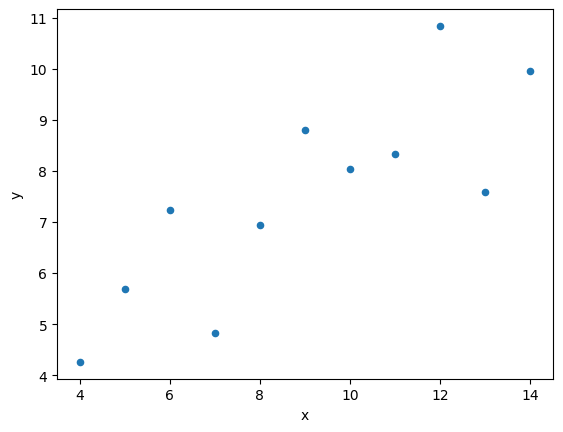

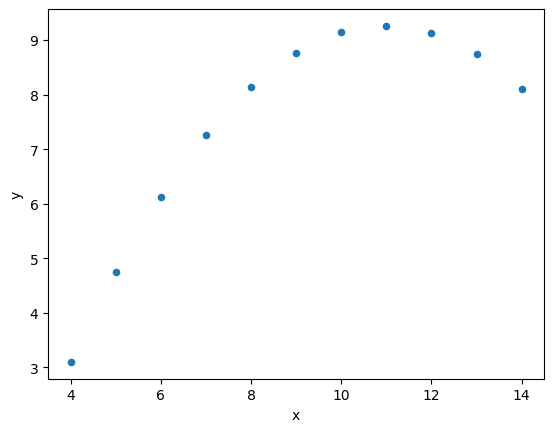

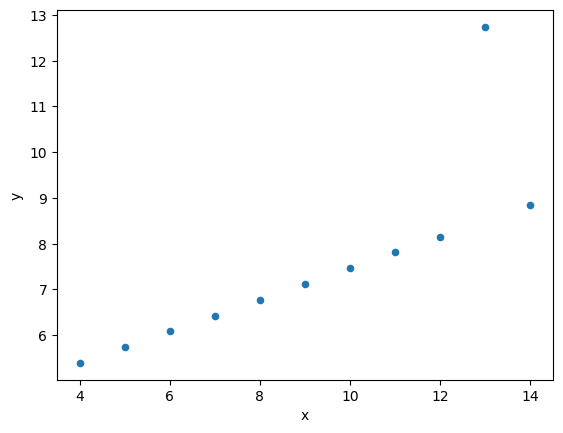

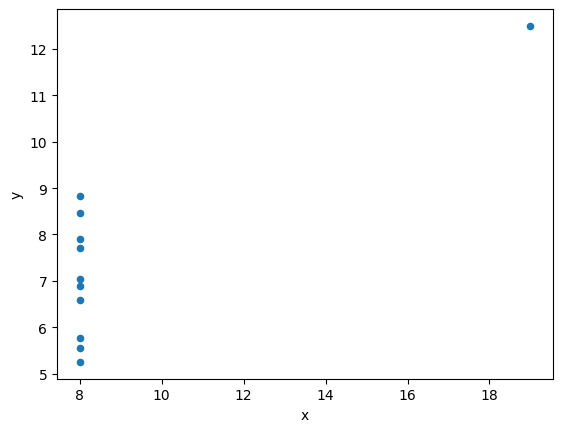

In [30]:
groups.plot(kind='scatter', x='x', y='y')

ไม่ได้เพราะว่า mean, s.d, corr ไม่แตกต่างกันมาก มีค่าใกล้เคียงกัน จะเห็นความแตกต่างหลังจาก plot จุด